Data Dictionary
Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

**survival:    Survival
PassengerId: Unique Id of a passenger. 
pclass:    Ticket class     
sex:    Sex     
Age:    Age in years     
sibsp:    # of siblings / spouses aboard the Titanic     
parch:    # of parents / children aboard the Titanic     
ticket:    Ticket number     
fare:    Passenger fare     
cabin:    Cabin number     
embarked:    Port of Embarkation
titanic_df.describe()**


In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import ElasticNet
from sklearn import tree
import pandas as pd
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier 


In [2]:
titanic_df = pd.read_csv("./Data/titanic.csv")


In [3]:
titanic_df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [4]:
titanic_df['Sex'] = titanic_df['Sex'].map({'female': 1, 'male': 0})
titanic_df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S


In [5]:
data = titanic_df.drop(columns=['PassengerId', 'Name', "Ticket", "Embarked", "Cabin"])
data.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
415,0,3,1,NaN,0,0,8.0500
50,0,3,0,7.0,4,1,39.6875
383,1,1,1,35.0,1,0,52.0000
533,1,3,1,NaN,0,2,22.3583
811,0,3,0,39.0,0,0,24.1500
499,0,3,0,24.0,0,0,7.7958
775,0,3,0,18.0,0,0,7.7500
421,0,3,0,21.0,0,0,7.7333
367,1,3,1,NaN,0,0,7.2292
348,1,3,0,3.0,1,1,15.9000


Mean age of passengers = 29.69911764705882


<Figure size 1224x720 with 0 Axes>

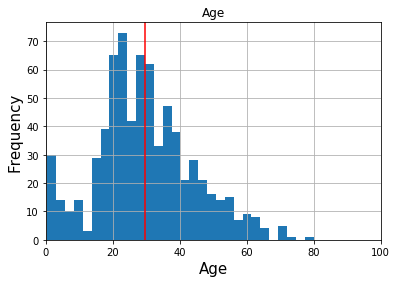

In [6]:
fig=plt.figure(figsize=(17,10))
data.hist(column="Age", bins=30)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.xlim([0.0,100.0])
plt.axvline(data["Age"].mean(), color="red")
print('Mean age of passengers = {}'.format(data["Age"].mean()))


In [7]:
data_nona = data["Age"].fillna(data["Age"].mean())
data["Age"]=data_nona
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.000000,1,0,7.2500
1,1,1,1,38.000000,1,0,71.2833
2,1,3,1,26.000000,0,0,7.9250
3,1,1,1,35.000000,1,0,53.1000
4,0,3,0,35.000000,0,0,8.0500
5,0,3,0,29.699118,0,0,8.4583
6,0,1,0,54.000000,0,0,51.8625
7,0,3,0,2.000000,3,1,21.0750
8,1,3,1,27.000000,0,2,11.1333
9,1,2,1,14.000000,1,0,30.0708


In [8]:
# data.info()

# Decision Tree

In [9]:
target = data["Survived"]
target_names = ["yes", "no"]

In [10]:
variable = data.drop("Survived", axis=1)
feature_names = variable.columns
variable.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(variable, target, random_state=42)

In [12]:
# y_test is what the outcome is, and y_predict is what the decision tree predicts it. 
#y_test is the survive column entries, and X_test the rest of the columns or the 
# variables we think affect the survivie. 
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test) 

0.757847533632287

In [13]:
clf.score(X_train, y_train) 

0.9820359281437125

In [14]:
y_predict = clf.predict(X_test)

# Random Forest

In [15]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_train, y_train)
# Have not done the cross validation

0.9820359281437125

In [16]:
rf.score(X_test, y_test)

0.7892376681614349

In [17]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf.feature_importances_
importances

array([0.08323495, 0.26509969, 0.26965623, 0.04966417, 0.03796109,
       0.29438387])

In [18]:
# We can sort the features by their importance
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.29438386571239894, 'Fare'),
 (0.2696562313598729, 'Age'),
 (0.2650996898094666, 'Sex'),
 (0.0832349480740798, 'Pclass'),
 (0.04966417387188175, 'SibSp'),
 (0.03796109117230007, 'Parch')]

# Support Vector Machine
With Radial-basis-function kernel

In [19]:
from sklearn.svm import SVC 
# using X_train, X_test, y_train, y_test
model = SVC(kernel='rbf')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
# compare y_predict to y_test

/Users/physics/anaconda/envs/PythonData/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [20]:
# if good prediction, what is y_predict - y_test = 0 

In [21]:
accuracy = model.score(X_test, y_test)
print(accuracy)

0.6771300448430493


In [22]:
# How do I assess accuracy
model.score(X_train, y_train)

0.8982035928143712

# Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
classifier.fit(X_train, y_train)

/Users/physics/anaconda/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8008982035928144
Testing Data Score: 0.7937219730941704


In [26]:
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).head()

,Prediction,Actual
709,0,1
439,0,0
840,0,0
720,1,1
39,1,1


# K Nearest Neighbor 

In [27]:
# KNN 
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train)  
Y_pred = knn.predict(X_test)  
acc_knn =knn.score(X_train, y_train)
print(acc_knn)

0.8383233532934131


In [28]:
knn.score(X_test, y_test)

0.695067264573991

# Neural Networks with Scikit-Learn 

In [29]:
# (64,16,8)

neural_network = MLPClassifier(hidden_layer_sizes=(64,16,8), solver="adam", random_state=1)

In [30]:
neural_network.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(64, 16, 8), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [31]:
print(f"Training Data Score: {neural_network.score(X_train, y_train)}")
print(f"Testing Data Score: {neural_network.score(X_test, y_test)}")

Training Data Score: 0.8293413173652695
Testing Data Score: 0.7937219730941704


# Elastic Net 

In [32]:
model = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)
model.fit(X_train, y_train)

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [33]:
# Create a dataframe with the features and coefficients
fc_df = pd.DataFrame(list(zip(variable.columns, model.coef_)), columns=['features', 'coefficients'])
fc_df.head()

,features,coefficients
0,Pclass,-0.00000
1,Sex,0.00000
2,Age,-0.00019
3,SibSp,-0.00000
4,Parch,0.00000


In [34]:
y_pred = model.predict(X_test)

In [35]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.06424540995541095
Testing Data Score: 0.06943104147311585


# K-Means

In [36]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)

kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [37]:
predicted_cluters = kmeans.predict(X_train)

In [38]:
print(f"Training Data Score: {kmeans.score(X_train, y_train)}")
print(f"Testing Data Score: {kmeans.score(X_test, y_test)}")


Training Data Score: -813247.3174016657
Testing Data Score: -189691.92314190615


# Naive Bayes 

In [39]:
from sklearn.naive_bayes import GaussianNB

naive_model = GaussianNB()

naive_model.fit(X_train, y_train)

print(f"Training Data Score: {naive_model.score(X_train, y_train)}")
print(f"Testing Data Score: {naive_model.score(X_test, y_test)}")


Training Data Score: 0.7964071856287425
Testing Data Score: 0.7802690582959642
